<a href="https://colab.research.google.com/github/Sydney-Anuyah/Algorithms/blob/main/LINEAR_CONGRUENTIAL_GENERATORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR CONGRUENTIAL GENERATORS

I am taking a course on Computational Finance. The topic was titled `Simulations and Monte Carlo Methods in Python for Option Pricing`. During this time, I heard a new term titled Linear Congruential Generators (LCG). Apparently, LCGs are a common mathematical principle for generating random numbers.

Have you ever wondered how random numbers are generated? Well, very simple, computers have algorithms that do generate these numbers. As a teacher, I like shuffling questions, so I use random numbers at times to assist me with my shuffling. Sometimes, the issue I have with my random numbers is that they are random, so they change too quickly, and sometimes, I get to lose my information. So, there is the concept of pseudo-random numbers. These are random numbers that are not so random, i.e., they follow a specific pattern. These pseudo-random numbers are needed in some complex calculations.

If you are conversant with financial terms, you might have heard of the term option. Now options have different pricing techniques, and one of them is the Monte Carlo Method. This method employs this psudorandom numbers for pricing. 


The formula for the LCG is:

$X_{n+1} = (a*X_n + c)$  $mod $     $ m $

Mod means the remainder left when a number is divided by m.
$X_n$ is the current random value generated and $X_{n+1}$ is the next random value to be generated.
$X_0$ is the seed value or the start value


There are best practices to note when performing this simulation like:

The multiplier (a) :        $ 0 < a ≤ m $        

The constant (c) :       $ 0 ≤ c < m $

The modulus (m) :       $ 0 < m $

$ 0 < X_n < m $


The first thing is to recreate this formula above in python code, which is quite simple

In [1]:
def lin_con_gen (n, a, c, m, x_0):
    random_list = [None] * n
    random_list[0] = (a*x_0 + c)%m
    for i in range (1, n):
        random_list[i] = (a*random_list[i-1] + c)%m
    return random_list

Let us run some tests. Let us run a test on 19 numbers

In [2]:
#Example 1

lin_con_gen (19, 5, 7, 17, 3)

[5, 15, 14, 9, 1, 12, 16, 2, 0, 7, 8, 13, 4, 10, 6, 3, 5, 15, 14]

You will notice that the figures starting looping after the 16th figure. 

In [3]:
#Example 2
lin_con_gen (19, 1, 17,  29, 5)

[22, 10, 27, 15, 3, 20, 8, 25, 13, 1, 18, 6, 23, 11, 28, 16, 4, 21, 9]

In [4]:
#Example 3

lin_con_gen (19, 4, 8, 12, 4)

[0, 8, 4, 0, 8, 4, 0, 8, 4, 0, 8, 4, 0, 8, 4, 0, 8, 4, 0]

Here, the loop starts at the third number

In [5]:
#Example 5

lin_con_gen (17, 5, 8, 121, 4)

[28, 27, 22, 118, 114, 94, 115, 99, 19, 103, 39, 82, 55, 41, 92, 105, 49]

   From the 5 examples, we have seen a pattern, that those with prime numbers actually perform better and produces a large range of reproducible random variable. From the Hull-Dobell, who was a researcher that spent time to find what characteristics of these numbers will produce the best results,  he came up with three options:
   1. m and c are prime numbers
   2. $a - 1$ is divisible by all prime factors of m
   3. $ a - 1 $ is divisible by 4, if m is divisible by 4.
 

I applied these rules, and it worked; however, I noticed that if I made the numbers very large, I could produce a very random size of random numbers, that by the time looping starts, it will be very hard to track. This is the system I use also in ethical hacking and cracking passwords. 

Now, I thought of using this large spread of possibilities and putting it in a range. So I can find any range of numbers and create a pseudo-random number. I decided to use a preset value just to make it more relatable.

My formula created for a random number $ x $ which is between the range $p $ and $q$ is

$ (q - p) * [X_{n-1} / m] $ + $p$

In [6]:
def rand_generators (lower_limit = 0, upper_limit = 1, count_gen = 50):
    reset_list = 0 * count_gen
    p = lin_con_gen(count_gen, 100009619, 100008917, 100008221, 3)
    p = [i/100008917 for i in p]
    diff = upper_limit - lower_limit
    p = [i*diff for i in p]
    p = [i + lower_limit for i in p]
    p = [round(i) for i in p]
    return p
        

This function takes the other function in it and can inputa range of random numbers. All you have to do is specify your lower limit, and your upper limit. You can also predict the number of values you want to be printed, however, if you do not, it is set to its default at 50 values.

In [7]:
#Example 1 (Here I even switched the limits between the upper and lower and it still works)
rand_generators(45, 10, 10)

[45, 43, 25, 11, 22, 31, 29, 21, 32, 14]

In [8]:
#Example 2 (Here I used the same figures as limits to see how it responds)
rand_generators(10, 10, 10)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [9]:
#Example 3 (Here I used the floats as limits to see how it responds)
rand_generators(10.9, 16.1, 10)

[11, 11, 14, 16, 14, 13, 13, 15, 13, 16]

In [10]:
#Example 4 (Here I used negatives as limits to see how it responds)
rand_generators(-100, -1, 10)

[-100, -93, -43, -2, -36, -60, -56, -31, -63, -12]

In [11]:
#Example 5 (Only specify the limits)
rand_generators(10, 90)

[10,
 15,
 56,
 89,
 62,
 42,
 46,
 66,
 40,
 81,
 51,
 84,
 30,
 30,
 71,
 26,
 84,
 72,
 40,
 60,
 83,
 72,
 61,
 20,
 22,
 78,
 17,
 53,
 86,
 71,
 81,
 13,
 24,
 66,
 14,
 88,
 54,
 31,
 50,
 37,
 44,
 30,
 39,
 23,
 17,
 29,
 30,
 53,
 44,
 60]

In [12]:
#Example 5 (Do not specify)
rand_generators()

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1]

Now that all my test cases worked. I believe that I have successfully created a good LCG; I will now plot simulations of the random variables, to see what it would look like

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plotter (x, title):
    plt.figure(figsize=(20,15))
    plt.plot(x)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Values")
    plt.title(title)
    return plt.show()

I created a simple function to assist us with the plotting

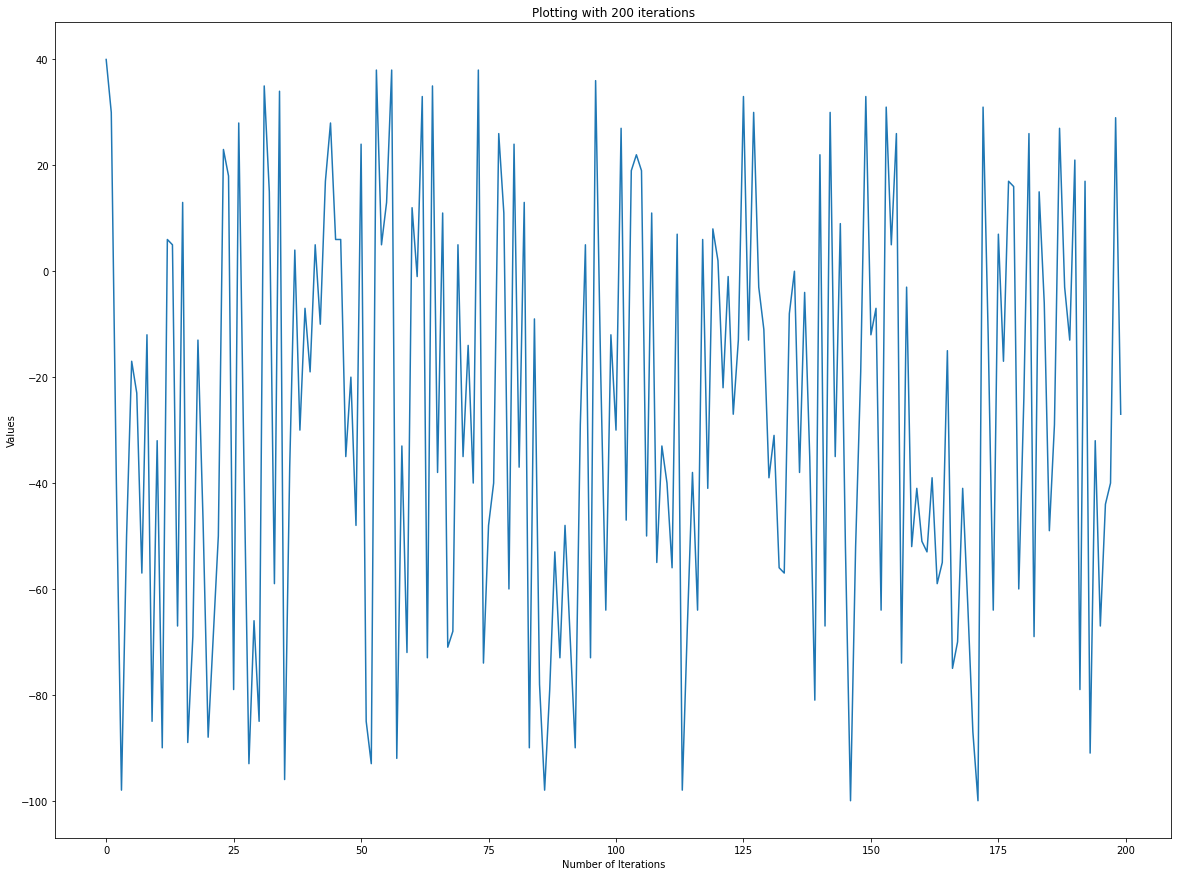

In [15]:
#Example 1 Plotting with 200 iterations
plotter (rand_generators(40, -100, 200), "Plotting with 200 iterations")

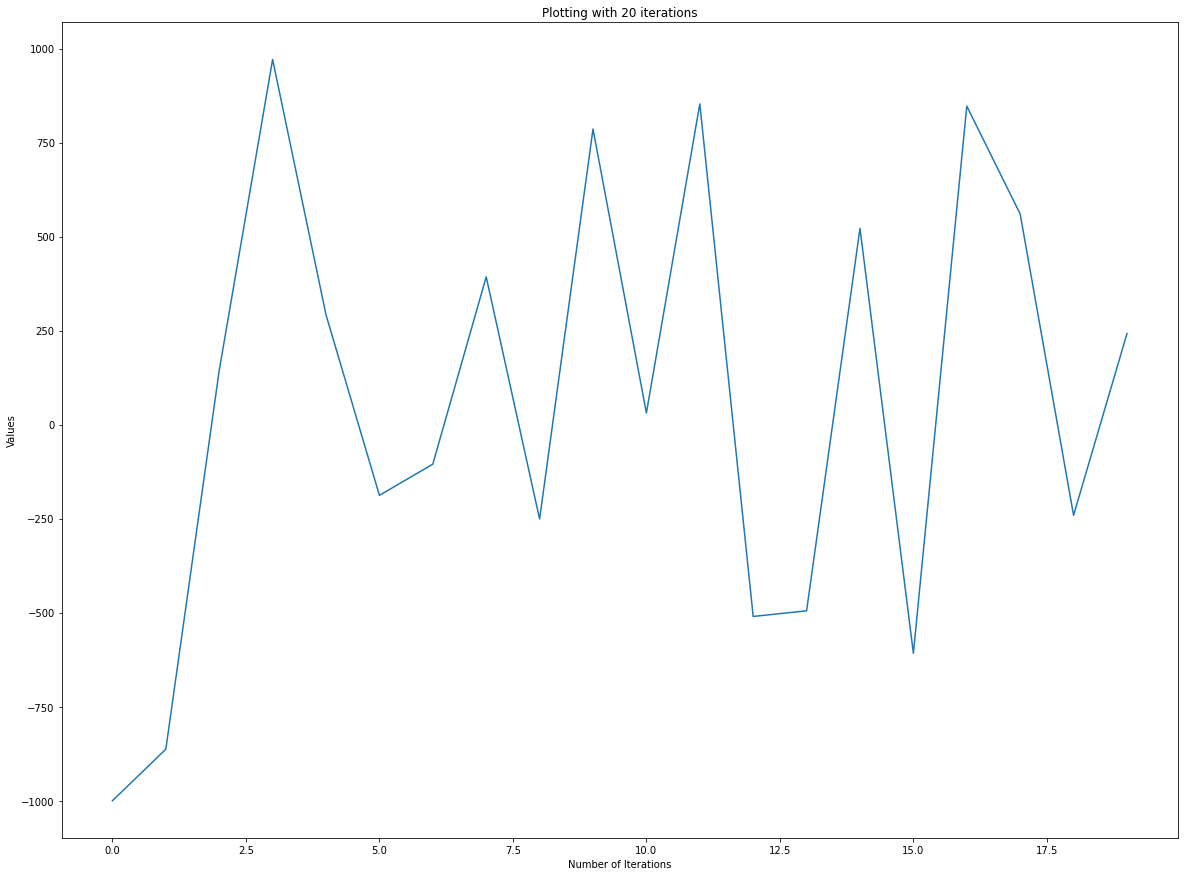

In [16]:
#Example 2 Plotting with 20 iterations
plotter (rand_generators(-1000, 1000, 20), "Plotting with 20 iterations")

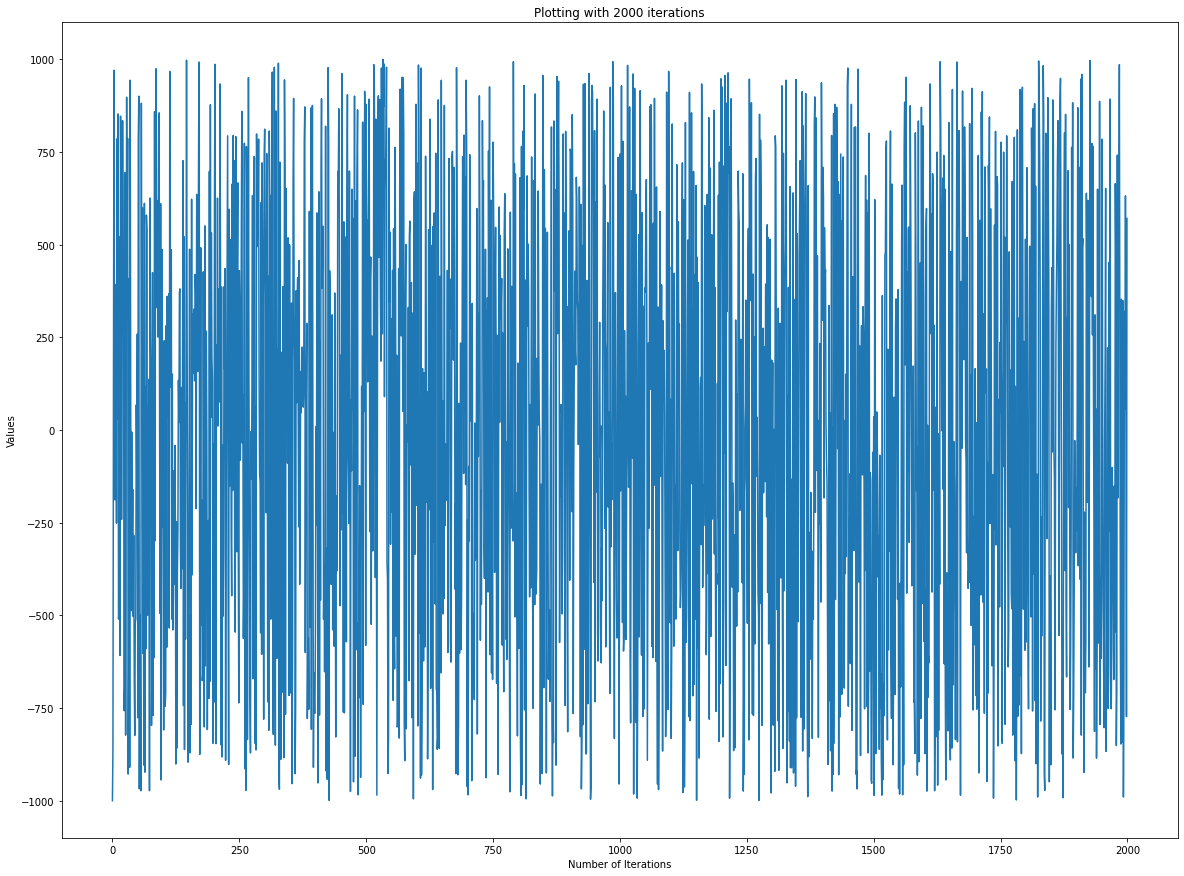

In [17]:
#Example 3 Plotting with 2000 iterations
plotter (rand_generators(-1000, 1000, 2000), "Plotting with 2000 iterations")

Copyrighted by Sydney Anuyah